In [ ]:
import pickle
from google.colab import drive

import pandas as pd
import numpy as np

import requests

from bs4 import BeautifulSoup
import os

In [ ]:
# Google dirve에 연결

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PATH
PATH_train='/content/drive/MyDrive/montage_project/train/'
PATH_train_montage = '/content/drive/MyDrive/montage_project/train/montage/'
PATH_train_json = '/content/drive/MyDrive/montage_project/train/H/'

PATH_train_resized='/content/drive/MyDrive/montage_project/train/resized/'

In [ ]:
PATH_test='/content/drive/MyDrive/montage_project/test/'
PATH_test_montage = '/content/drive/MyDrive/montage_project/test/montage/'
PATH_test_json = '/content/drive/MyDrive/montage_project/test/H/'


# json -> dic_train_json / dic_test_json 만들기

In [ ]:
import os

train_json_list = os.listdir(PATH_train_json)

## Train의 json 파일 8071개 이름 list
filename_TJ = [file for file in train_json_list if file.endswith('.json')] 
print(len(filename_TJ))

import json

dict_json = []
for i,v in enumerate(filename_TJ):
  print(i,': ',v)
  a_json = open(PATH_train_json+v,"r")
  a_dict = json.load(a_json)
  dict_json.append(a_dict)

print(len(dict_json))

df_Data = pd.DataFrame(dict_json)
df_Data.to_pickle(PATH_train+'df_train_json.pickle')



df_train = pd.read_pickle(PATH_train+'df_train_json.pickle')
dic_train={
    # 고유 아이디
    'org_id':[],
    # 나이
    'age':[],
    # 성별
    'gender':[],
    # 얼굴유형
    'face':[],
    #얼굴크기
    #이마유형
    #머리스타일유형
    'hairstyle':[],
    #앞머리길이
    #옆머리길이
    #눈썹유형
    'eyebrows':[]
    #눈썹짙음
    #눈크기
    #눈유형
    #코크기
    #코길이
    #입유형
    #입크기
    #수염
    #구렛나룻
}

for i in range(len(df_train['info'])):
  dic_train['org_id'].append(str(df_train['info'][i][0]['org_id']))
  dic_train['age'].append(str(df_train['info'][i][0]['age']))
  dic_train['gender'].append(df_train['info'][i][0]['gender'])
  dic_train['face'].append(df_train['descripton'][i][0]['face']['type'])
  dic_train['hairstyle'].append(df_train['descripton'][i][0]['hairstyle']['type'])
  dic_train['eyebrows'].append(df_train['descripton'][i][0]['eyebrows']['type'])


print(len(dic_train),len(dic_train['org_id']))

import pickle
import gzip


with gzip.open(PATH_train+'dic_train_json.pickle','wb') as f:
  pickle.dump(dic_train,f)


In [ ]:
# 1) json 파일 가져오기 -> df_test -> df_test.json.pickle
import os

test_json_list = os.listdir(PATH_test_json)

## Test의 json 파일 1010개 이름 list
filename_TestJ = [file for file in test_json_list if file.endswith('.json')] 
print(len(filename_TestJ))

import json

dic_json = []
for i,v in enumerate(filename_TestJ):
  a_json = open(PATH_test_json+v,"r")
  a_dict = json.load(a_json)
  dic_json.append(a_dict)

print(len(dic_json))

df_test = pd.DataFrame(dic_json)
df_test.to_pickle(PATH_test+'df_test_json.pickle')


# 2) json pickle 가져오기 df_test -> dic_test

PATH_test='/content/drive/MyDrive/montage_project/test/'
PATH_test_montage = '/content/drive/MyDrive/montage_project/test/montage/'
PATH_test_json = '/content/drive/MyDrive/montage_project/test/H/'

df_test = pd.read_pickle(PATH_test+'df_test_json.pickle')
df_test.head()
len(df_test)

dic_test={
    # 고유 아이디
    'org_id':[],
    # 나이
    'age':[],
    # 성별
    'gender':[],
    # 얼굴유형
    'face':[],
    #얼굴크기
    #이마유형
    #머리스타일유형
    'hairstyle':[],
    #앞머리길이
    #옆머리길이
    #눈썹유형
    'eyebrows':[]

    #눈썹짙음
    #눈크기
    #눈유형
    #코크기
    #코길이
    #입유형
    #입크기
    #수염
    #구렛나룻
}

for i in range(len(df_test['info'])):
  dic_test['org_id'].append(str(df_test['info'][i][0]['org_id']))
  dic_test['age'].append(str(df_test['info'][i][0]['age']))
  dic_test['gender'].append(df_test['info'][i][0]['gender'])
  dic_test['face'].append(df_test['descripton'][i][0]['face']['type'])
  dic_test['hairstyle'].append(df_test['descripton'][i][0]['hairstyle']['type'])
  dic_test['eyebrows'].append(df_test['descripton'][i][0]['eyebrows']['type'])


print(len(dic_test),len(dic_test['org_id']))

import pickle
import gzip


with gzip.open(PATH_test+'dic_test_json.pickle','wb') as f:
  pickle.dump(dic_test,f)


1010
1010
6 1010


6 8071


# 사진 -> dic_train_img_re / dic_test_img_re *만들기*

In [ ]:
import os
train_montage_list = os.listdir(PATH_train_montage)

## Train의 Montage 파일 8071개 이름 list
filename_TM = [file for file in train_montage_list if file.endswith('.png')] 
len(filename_TM)

import cv2 # 이미지를 읽어들일때 사용(저장할때 사용)

dic_pic = {}
for i,v in enumerate(filename_TM):
    list_pic=[]
    # 이미지 불러오기!
    img = cv2.imread(PATH_train_montage+filename_TM[i],cv2.IMREAD_COLOR)
    # 이미지 resize!
    # 이미지의 x, y가 224이 넘을 경우 작게해주기
    percent = 1
    if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 640으로 맞추고 세로를 비율에 맞춰서
          percent = 224/img.shape[1]
    else :
          percent = 224/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)

    # padding 하는 구간
    # 이미지 범위 지정 ; 높이 너비
    y,x,h,w = (0,0,img.shape[0], img.shape[1])

    # 그림 주변에 검은색으로 칠하기
    w_x = (224-(w-x))/2  # w_x = (224 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
    h_y = (224-(h-y))/2

    # 크기가 -면 0으로 지정.
    if(w_x < 0):  w_x = 0
    elif(h_y < 0):  h_y = 0

    M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  
    dic_pic[v]=img_re


import pickle
import gzip

with gzip.open(PATH_train+'dic_train_img_re.pickle','wb') as f:
  pickle.dump(dic_pic,f)


In [ ]:
import os
test_montage_list = os.listdir(PATH_test_montage)

## Train의 Montage 파일 1010개 이름 list
filename_TestM = [file for file in test_montage_list if file.endswith('.png') or file.endswith('jpg')] 
print(len(filename_TestM))

import cv2 # 이미지를 읽어들일때 사용(저장할때 사용)

dic_pic = {}
for i,v in enumerate(filename_TestM):
    list_pic=[]
    # 이미지 불러오기!
    img = cv2.imread(PATH_test_montage+filename_TestM[i],cv2.IMREAD_COLOR)
    # 이미지 resize!
    # 이미지의 x, y가 224이 넘을 경우 작게해주기
    percent = 1
    if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 640으로 맞추고 세로를 비율에 맞춰서
          percent = 224/img.shape[1]
    else :
          percent = 224/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)

    # padding 하는 구간
    # 이미지 범위 지정 ; 높이 너비
    y,x,h,w = (0,0,img.shape[0], img.shape[1])

    # 그림 주변에 검은색으로 칠하기
    w_x = (224-(w-x))/2  # w_x = (224 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
    h_y = (224-(h-y))/2

    # 크기가 -면 0으로 지정.
    if(w_x < 0):  w_x = 0
    elif(h_y < 0):  h_y = 0

    M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  
    dic_pic[v]=img_re


import pickle
import gzip

with gzip.open(PATH_test+'dic_test_img_re.pickle','wb') as f:
  pickle.dump(dic_pic,f)

print(len(dic_pic))

1010
1010


# ----------------------------------------------------------------------------------------------------------------------------------

# train argm -> dic_train_img_au 만들기

## 0)Trainset Augmentation

In [ ]:
## 증강 모델
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
## dic json 불러오기!
import gzip

with gzip.open(PATH_train+'dic_train_json.pickle','rb') as f:
  dic_train = pickle.load(f)

print(len(dic_train),len(dic_train['org_id']))

6 8071


In [ ]:
type(dic_train['org_id']),dic_train.keys()

(list, dict_keys(['org_id', 'age', 'gender', 'face', 'hairstyle', 'eyebrows']))

In [ ]:
set(dic_train['hairstyle'])

{'곱슬머리', '스포츠형', '웨이브형', '직모(생머리)', '탈모형'}

In [ ]:
import collections, numpy

aUnique = dic_train['hairstyle']

unique, counts = numpy.unique(aUnique, return_counts=True)

print(dict(zip(unique, counts)));  



{'곱슬머리': 2392, '스포츠형': 199, '웨이브형': 976, '직모(생머리)': 4467, '탈모형': 37}


In [ ]:
dic_train['hairstyle'][0]

'직모(생머리)'

In [ ]:
dic_train['org_id'][0]

'545'

In [ ]:
## dic 사진 불러오기!
with gzip.open(PATH_train+'dic_train_img_re.pickle','rb') as f:
  dic_train_img_re = pickle.load(f)

print(len(dic_train_img_re),len(dic_train_img_re['20.png']))

8071 224


In [ ]:
type(dic_train_img_re['20.png']),dic_train_img_re['20.png'].shape

(numpy.ndarray, (224, 224, 3))

In [ ]:
pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0it [00:00, ?it/s]

545 직모(생머리)


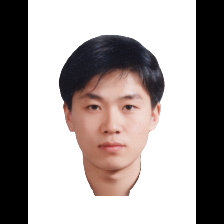

1120 직모(생머리)


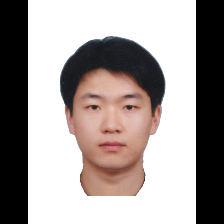

5163 직모(생머리)


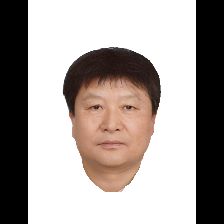

4322 직모(생머리)


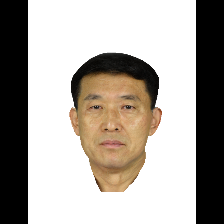

816 스포츠형


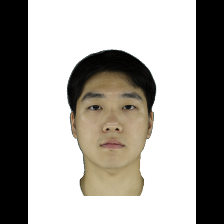

115 직모(생머리)


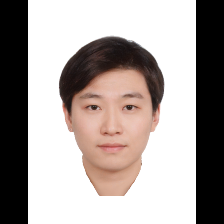

9510 직모(생머리)


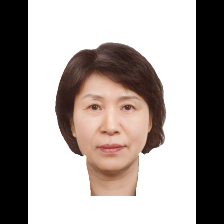

1989 곱슬머리


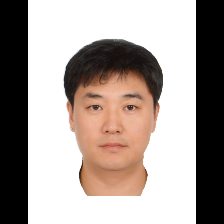

11960 곱슬머리


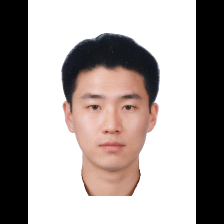

4772 직모(생머리)


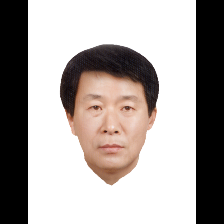

1823 직모(생머리)


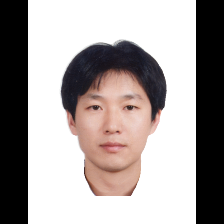

In [ ]:
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow


for i,title in tqdm(enumerate(dic_train['org_id'])):
    print(title,dic_train['hairstyle'][i])
    cv2_imshow(dic_train_img_re[title+'.png'])
    if i==10: break

In [ ]:
#{'곱슬머리', '스포츠형', '웨이브형', '직모(생머리)', '탈모형'}

# type2

from tqdm.notebook import tqdm

## 증강 사진 g드라이브 에 저장
import cv2

PATH_train_augm = '/content/drive/MyDrive/montage_project/train/augm2/'


for index,title in tqdm(enumerate(dic_train['org_id'])):
    if dic_train['hairstyle'][index] == '스포츠형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 11: break   # 12번
    elif dic_train['hairstyle'][index] == '웨이브형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 1: break   # 2번
    elif dic_train['hairstyle'][index] == '탈모형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 66: break   # 67번
        

0it [00:00, ?it/s]

In [ ]:
#{'곱슬머리', '스포츠형', '웨이브형', '직모(생머리)', '탈모형'}
# type6

from tqdm.notebook import tqdm

## 증강 사진 g드라이브 에 저장
import cv2

PATH_train_augm = '/content/drive/MyDrive/montage_project/train/augm6/'


for index,title in tqdm(enumerate(dic_train['org_id'])):
    if dic_train['hairstyle'][index] == '곱슬머리':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 0: break   # 1번    
    elif dic_train['hairstyle'][index] == '스포츠형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 22: break   # 23번
    elif dic_train['hairstyle'][index] == '웨이브형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 3: break   # 4번
    elif dic_train['hairstyle'][index] == '탈모형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 132: break   # 133번
        

0it [00:00, ?it/s]

In [ ]:
#{'곱슬머리', '스포츠형', '웨이브형', '직모(생머리)', '탈모형'}
# type7

from tqdm.notebook import tqdm

## 증강 사진 g드라이브 에 저장
import cv2

PATH_train_augm = '/content/drive/MyDrive/montage_project/train/augm7/'
dic_val_img_re={}

for index,title in tqdm(enumerate(dic_train['org_id'])):
    if index <1000:
      dic_val_img_re[title]= dic_train_img_re[title+'.png']
      continue
    if dic_train['hairstyle'][index] == '곱슬머리':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 0: break   # 1번    
    elif dic_train['hairstyle'][index] == '스포츠형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 22: break   # 23번
    elif dic_train['hairstyle'][index] == '웨이브형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 3: break   # 4번
    elif dic_train['hairstyle'][index] == '탈모형':
      img = dic_train_img_re[title+'.png']
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      i = 0
      # flow : augmentation 함수
      for batch in datagen.flow(x, batch_size=1,save_to_dir=PATH_train_augm, save_prefix=title, save_format='png'):
        i += 1
        if i > 132: break   # 133번
        

0it [00:00, ?it/s]

In [ ]:
cd /content/drive/MyDrive/montage_project/train/augm7/

/content/drive/MyDrive/montage_project/train/augm7


In [ ]:
ls -l | grep ^- | wc -l

13686


In [ ]:
len(dic_val_img_re)

1000

In [ ]:
import pickle
import gzip

with gzip.open(PATH_train+'dic_val_img_re_type7.pickle','wb') as f:
  pickle.dump(dic_val_img_re,f)


In [ ]:
import os
PATH_train_augm = '/content/drive/MyDrive/montage_project/train/augm7/'

train_augm_list = os.listdir(PATH_train_augm)

## argm파일 9086...?개 이름 list
filename_Ta = [file for file in train_augm_list if file.endswith('.png')] 
print(len(filename_Ta))

import cv2 # 이미지를 읽어들일때 사용(저장할때 사용)

dic_pic = {}
for i,title in enumerate(filename_Ta):
    # 이미지 불러오기!
    img = cv2.imread(PATH_train_augm+title,cv2.IMREAD_COLOR)
    img_ar=np.array(img)
    dic_pic[title]=img_ar


import pickle
import gzip

with gzip.open(PATH_train+'dic_train_img_aut7.pickle','wb') as f:
  pickle.dump(dic_pic,f)


13686


In [ ]:
len(dic_pic)

13686

# **train Lable 만들기***

In [ ]:
import gzip

## dic re 사진 불러오기!
with gzip.open(PATH_train+'dic_train_img_re.pickle','rb') as f:
  dic_train_img_re = pickle.load(f)

print(len(dic_train_img_re),dic_train_img_re['20.png'].shape)

8071 (224, 224, 3)


In [ ]:
## dic au 사진 불러오기!
with gzip.open(PATH_train+'dic_train_img_aut7.pickle','rb') as g:
  dic_train_img_au = pickle.load(g)

len(dic_train_img_au)

13686

In [ ]:
## dic au 사진 불러오기!
with gzip.open(PATH_train+'dic_val_img_re_type7.pickle','rb') as c:
  dic_val_img_re = pickle.load(c)

len(dic_val_img_re)

1000

In [ ]:
# dic_train json 가져오기

import pickle
import gzip


with gzip.open(PATH_train+'dic_train_json.pickle','rb') as f:
  dic_train=pickle.load(f)

len(dic_train)

6

In [ ]:
# type7
train_img_list=[]
train_hairstyle_label=[]
train_orgid_list=[]
# 원본 전처리
#{'곱슬머리', '스포츠형', '웨이브형', '직모(생머리)', '탈모형'}

for i,title in enumerate(dic_train_img_re.keys()):
  # 이미지 title,org_id = v -> title_num
  title_num = title.split('.')[0]
  # img list 만들기
  train_img_list.append(dic_train_img_re[title])
  # org_id 둘러보고 dic_train 값 제공
  for j,k in enumerate(dic_train['org_id']):
    if k == title_num:
      train_orgid_list.append(title_num)
      # hairstyle label 만들기   
      hairstyle= dic_train['hairstyle'][j]
      if(hairstyle =='곱슬머리'):  train_hairstyle_label.append(0)
      elif(hairstyle =='스포츠형' ):  train_hairstyle_label.append(1)
      elif(hairstyle =='웨이브형'):  train_hairstyle_label.append(2)
      elif(hairstyle =='직모(생머리)'): train_hairstyle_label.append(3)
      elif(hairstyle == '탈모형'):  train_hairstyle_label.append(4)

In [ ]:
# type7
val_img_list=[]
val_hairstyle_label=[]
# 원본 전처리
#{'곱슬머리', '스포츠형', '웨이브형', '직모(생머리)', '탈모형'}

for i,title in enumerate(dic_val_img_re.keys()):
  # 이미지 title,org_id = v -> title_num
  title_num = title.split('.')[0]
  # val img list 만들기
  val_img_list.append(dic_val_img_re[title])
  for j,k in enumerate(dic_train['org_id']):
    if k == title_num:
      # hairstyle label 만들기  
      hairstyle= dic_train['hairstyle'][j]
      if(hairstyle =='곱슬머리'):  val_hairstyle_label.append(0)
      elif(hairstyle =='스포츠형' ):  val_hairstyle_label.append(1)
      elif(hairstyle =='웨이브형'):  val_hairstyle_label.append(2)
      elif(hairstyle =='직모(생머리)'): val_hairstyle_label.append(3)
      elif(hairstyle == '탈모형'):  val_hairstyle_label.append(4)

In [ ]:
print(len(train_img_list),len(train_orgid_list),len(train_hairstyle_label),len(val_img_list),len(val_hairstyle_label))

8071 8071 8071 1000 1000


In [ ]:
# 원본 전처리
#{'곱슬머리', '스포츠형', '웨이브형', '직모(생머리)', '탈모형'}
# type2
s=0
for i,title in enumerate(dic_train_img_re.keys()):
  # img list 만들기
  # 이미지 title,org_id = v -> title_num
 # print(v)
  title_num = title.split('.')[0]
  # org_id 둘러보고 dic_train 값 제공
  for j,k in enumerate(dic_train['org_id']):
    if k == title_num:
#      print(j,k)
      # age label 만들기
      age= float(dic_train['age'][j])
      if 20 <= age <35 :  train_age_label.append(0)
      elif 35 <= i < 50 :  train_age_label.append(1)
      else: train_age_label.append(2)
      # gender label 만들기
      gender=dic_train['gender'][j]
      if(gender =='M'): train_gender_label.append(0)
      else: train_gender_label.append(1)
      # face label 만들기
      face = dic_train['face'][j]
      if(face =='계란형'):  train_face_label.append(0)
      elif(face =='긴형'):  train_face_label.append(1)
      elif(face =='둥근형'):  train_face_label.append(2)
      else:  train_face_label.append(3)
      
      # hairstyle label 만들기  
      hairstyle= dic_train['hairstyle'][j]
      if(hairstyle =='곱슬머리'):  
        train_hairstyle_label.append(0)
        train_img_list.append(dic_train_img_re[title])
      elif(hairstyle =='스포츠형' ):  
        train_hairstyle_label.append(1)
        train_img_list.append(dic_train_img_re[title])
      elif(hairstyle =='웨이브형'):  
        train_hairstyle_label.append(2)
        train_img_list.append(dic_train_img_re[title])
      elif(hairstyle =='직모(생머리)' and s <2500): 
        train_hairstyle_label.append(3)
        train_img_list.append(dic_train_img_re[title])
        s+=1
      elif(hairstyle == '탈모형'):  
        train_hairstyle_label.append(4)
        train_img_list.append(dic_train_img_re[title])

      # eyebrows label 만들기  
      eyebrows= dic_train['eyebrows'][j]
      if(eyebrows =='각진형'):  train_eyebrows_label.append(0)
      elif(eyebrows =='둥근형'):  train_eyebrows_label.append(1)
      elif(eyebrows =='물결형'):  train_eyebrows_label.append(2)
      elif(eyebrows =='직선형'):  train_eyebrows_label.append(3)
      else:  train_eyebrows_label.append(4)

In [ ]:
print(len(train_img_list),len(train_hairstyle_label))

8071 8071


In [ ]:
set(train_hairstyle_label)

{0, 1, 2, 3, 4}

In [ ]:
import collections, numpy

aUnique = train_hairstyle_label

unique, counts = numpy.unique(aUnique, return_counts=True)

print(dict(zip(unique, counts)));  



{0: 2392, 1: 199, 2: 976, 3: 4467, 4: 37}


In [ ]:
train_orgid_list[0]

'9539'

In [ ]:
# 증강 추가 하기

for i,title in enumerate(dic_train_img_au.keys()):
  # img list 만들기
  train_img_list.append(dic_train_img_au[title])
  # 이미지 title,org_id = v -> title_num
 # print(v)
  title = title.split('.')[0]
  title_num = title.split('_0_')[0]
  # org_id 둘러보고 dic_train 값 제공
  for i,k in enumerate(train_orgid_list):
    if k == title_num:
      index = dic_train['org_id'].index(k)
      # hairstyle label 만들기  
      hairstyle= dic_train['hairstyle'][index]
      if(hairstyle =='곱슬머리'): train_hairstyle_label.append(0)
      elif(hairstyle =='스포츠형'):  train_hairstyle_label.append(1)
      elif(hairstyle =='웨이브형'):  train_hairstyle_label.append(2)
      elif(hairstyle =='직모(생머리)'):  train_hairstyle_label.append(3)
      elif(hairstyle =='탈모형'):  train_hairstyle_label.append(4)

In [ ]:
print(len(train_img_list),len(train_hairstyle_label),len(val_img_list),len(val_hairstyle_label))

21757 21757 1000 1000


In [ ]:
type(train_hairstyle_label)

list

In [ ]:
import collections, numpy

aUnique = train_hairstyle_label

unique, counts = numpy.unique(aUnique, return_counts=True)

print(dict(zip(unique, counts)));  



{0: 4508, 1: 4128, 2: 4388, 3: 4467, 4: 4266}


In [ ]:
import collections, numpy

aUnique = val_hairstyle_label

unique, counts = numpy.unique(aUnique, return_counts=True)

print(dict(zip(unique, counts)));  



{0: 276, 1: 28, 2: 123, 3: 568, 4: 5}


In [ ]:
import numpy as np
train_img_ar = np.array(train_img_list)
train_hairstyle_label = np.array(train_hairstyle_label)  
val_img_ar = np.array(val_img_list)
val_hairstyle_label = np.array(val_hairstyle_label)  


In [ ]:
print(len(train_img_ar),len(train_hairstyle_label),len(val_img_ar),len(val_hairstyle_label))

21757 21757 1000 1000


In [ ]:
dic_train_label={}
dic_train_label['train_img_ar']= train_img_ar
dic_train_label['train_hairstyle_label']= train_hairstyle_label
dic_train_label['val_img_ar']= val_img_ar
dic_train_label['val_hairstyle_label']= val_hairstyle_label

len(dic_train_label),len(dic_train_label['train_img_ar']),len(dic_train_label['train_hairstyle_label']),len(dic_train_label['val_img_ar']),len(dic_train_label['val_hairstyle_label'])

(4, 21757, 21757, 1000, 1000)

In [ ]:
np.save(PATH_train+'np_train_img_type7',train_img_ar)

In [ ]:
np.save(PATH_train+'np_hairstyle_label_type7',train_hairstyle_label)

In [ ]:
print(len(train_img_ar),len(train_hairstyle_label))

12911 12911


In [ ]:
train_img_ar.shape

(12911, 224, 224, 3)

In [ ]:
train_hairstyle_label.shape

(12911,)

In [ ]:
import collections, numpy

aUnique = train_hairstyle_label

unique, counts = numpy.unique(aUnique, return_counts=True)

print(dict(zip(unique, counts)));  



{0: 2392, 1: 2583, 2: 2928, 3: 2500, 4: 2508}


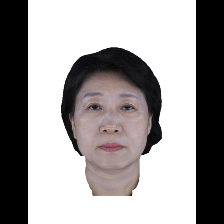

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(dic_train_label['train_img_ar'][0])


In [ ]:
print(dic_train_label['train_age_label'][0],dic_train_label['train_gender_label'][0],dic_train_label['train_face_label'][0],dic_train_label['train_hairstyle_label'][0])

2 1 0 3


In [ ]:
# label g드라이브에 저장하기

with gzip.open(PATH_train+'dic_train_label_type7.pickle','wb') as f:
  pickle.dump(dic_train_label,f, protocol=4)


In [ ]:
# 라벨 설정
class_names_age = ['20~35','25~50','50']
class_names_gender = ['M','F']
class_names_face = ['계란형','긴형','둥근형','마름모형','사각형','역삼각형']
class_names_hairstyle = ['곱슬머리','직모(생머리)','나머지']
class_names_eyebrows =['각진형','둥근형','물결형','직선형','분류없음']

# **test Lable 만들기***

In [ ]:
## dic 사진 불러오기!
with gzip.open(PATH_test+'dic_test_img_re.pickle','rb') as f:
  dic_test_img_re = pickle.load(f)

print(len(dic_test_img_re),dic_test_img_re['3301.png'].shape)

1010 (224, 224, 3)


In [ ]:
## dic json 불러오기!
with gzip.open(PATH_test+'dic_test_json.pickle','rb') as f:
  dic_test = pickle.load(f)

print(len(dic_test),len(dic_test['org_id']))

6 1010


In [ ]:
import pickle
import gzip


with gzip.open(PATH_test+'dic_test_json.pickle','rb') as f:
  dic_test=pickle.load(f)

len(dic_test)

6

In [ ]:
test_img_list=[]
test_age_label=[]
test_gender_label=[]
test_face_label=[]
test_hairstyle_label=[]
test_eyebrows_label=[]


for i,title in enumerate(dic_test_img_re.keys()):
  # img list 만들기
  test_img_list.append(dic_test_img_re[title])
  # 이미지 title,org_id = v -> title_num
 # print(v)
  title_num = title.split('.')[0]
  # org_id 둘러보고 dic_train 값 제공
  for j,k in enumerate(dic_test['org_id']):
    if k == title_num:
#      print(j,k)
      # age label 만들기
      age= float(dic_test['age'][j])
      if 20 <= age <35 :  test_age_label.append(0)
      elif 35 <= i < 50 :  test_age_label.append(1)
      else: test_age_label.append(2)
      # gender label 만들기
      gender=dic_test['gender'][j]
      if(gender =='M'): test_gender_label.append(0)
      else: test_gender_label.append(1)
      # face label 만들기
      face = dic_test['face'][j]
      if(face =='계란형'):  test_face_label.append(0)
      elif(face =='긴형'):  test_face_label.append(1)
      elif(face =='둥근형'):  test_face_label.append(2)
      else:  test_face_label.append(3)
      # hairstyle label 만들기  
      hairstyle= dic_test['hairstyle'][j]
      if(hairstyle =='곱슬머리'):  test_hairstyle_label.append(0)
      elif(hairstyle =='직모(생머리)'):  test_hairstyle_label.append(1)
      else:  test_hairstyle_label.append(2)
      # eyebrows label 만들기  
      eyebrows= dic_test['eyebrows'][j]
      if(eyebrows =='각진형'):  test_eyebrows_label.append(0)
      elif(eyebrows =='둥근형'):  test_eyebrows_label.append(1)
      elif(eyebrows =='물결형'):  test_eyebrows_label.append(2)
      elif(eyebrows =='직선형'):  test_eyebrows_label.append(3)
      else:  test_eyebrows_label.append(4)

In [ ]:
print(len(test_img_list),len(test_age_label),len(test_gender_label),len(test_face_label),len(test_hairstyle_label),len(test_eyebrows_label))

1010 1010 1010 1010 1010 1010


In [ ]:
import numpy as np
test_img_ar = np.array(test_img_list)
test_age_label = np.array(test_age_label)
test_gender_label = np.array(test_gender_label)
test_face_label = np.array(test_face_label)
test_hairstyle_label = np.array(test_hairstyle_label)  
test_eyebrows_label= np.array(test_eyebrows_label)  

In [ ]:
print(len(test_img_ar),len(test_age_label),len(test_gender_label),len(test_face_label),len(test_hairstyle_label),len(test_eyebrows_label))

1010 1010 1010 1010 1010 1010


In [ ]:
dic_test_label={}
dic_test_label['test_img_ar']= test_img_ar
dic_test_label['test_hairstyle_label']= test_hairstyle_label
len(dic_test_label),len(dic_test_label['test_img_ar'])

(2, 1010)

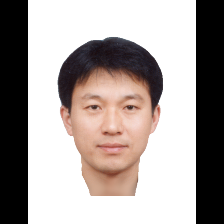

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(dic_test_label['test_img_ar'][0])


In [ ]:
print(dic_test_label['test_age_label'][0],dic_test_label['test_gender_label'][0],dic_test_label['test_face_label'][0],dic_test_label['test_hairstyle_label'][0])

2 0 0 1


In [ ]:
# label g드라이브에 저장하기

with gzip.open(PATH_test+'dic_test_label_type7.pickle','wb') as f:
  pickle.dump(dic_test_label,f, protocol=4)


In [ ]:
# 라벨 설정
class_names_age = ['20~35','25~50','50']
class_names_gender = ['M','F']
class_names_face = ['계란형','긴형','둥근형','마름모형','사각형','역삼각형']
class_names_hairstyle = ['곱슬머리','직모(생머리)','나머지']
class_names_eyebrows =['각진형','둥근형','물결형','직선형','분류없음']

# ** 전처리 데이터 살펴보기**

In [ ]:
## dic json 불러오기!
import gzip

with gzip.open(PATH_train+'dic_train_label_type6.pickle','rb') as f:
  dic_train_label = pickle.load(f)

len(dic_train_label)

6

In [ ]:
dic_train_label.keys()

dict_keys(['train_img_ar', 'train_age_label', 'train_gender_label', 'train_face_label', 'train_hairstyle_label', 'train_eyebrows_label'])

In [ ]:
len(dic_train_label['train_img_ar'])

23832

In [ ]:
import numpy 

unique, counts = numpy.unique(dic_train_label['train_hairstyle_label'], return_counts=True)
dict(zip(unique, counts))

{0: 4784, 1: 4773, 2: 4880, 3: 4467, 4: 4928}

In [ ]:
len(dic_train_label['train_hairstyle_label'])

23832

In [ ]:
np.save(PATH_train+'np_train_img_type6',dic_train_label['train_img_ar'])

In [ ]:
np.save(PATH_train+'np_train_label_type6',dic_train_label['train_hairstyle_label'])

In [ ]:
## dic json 불러오기!
import gzip

with gzip.open(PATH_train+'dic_train_label_type1.pickle','rb') as f:
  dic_train_label = pickle.load(f)

len(dic_train_label)

6

In [ ]:
dic_train_label.keys()

dict_keys(['train_img_ar', 'train_age_label', 'train_gender_label', 'train_face_label', 'train_hairstyle_label', 'train_eyebrows_label'])

In [ ]:
len(dic_train_label['train_img_ar'])


24070

In [ ]:
import numpy 

unique, counts = numpy.unique(dic_train_label['train_hairstyle_label'], return_counts=True)
dict(zip(unique, counts))

{0: 4784, 1: 4972, 2: 4880, 3: 4467, 4: 4967}

In [ ]:
len(dic_train_label['train_hairstyle_label'])

24070